In [21]:
import tobac
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [22]:
data = tobac.testing.make_sample_data_2D_3blobs()
data

<xarray.DataArray 'w' (time: 100, y: 200, x: 100)>
[2000000 values with dtype=float64]
Coordinates:
  * time       (time) datetime64[ns] 2000-01-01T12:00:00 ... 2000-01-01T13:39:00
  * y          (y) float64 0.0 1e+03 2e+03 3e+03 ... 1.97e+05 1.98e+05 1.99e+05
  * x          (x) float64 0.0 1e+03 2e+03 3e+03 ... 9.7e+04 9.8e+04 9.9e+04
    latitude   (y, x) float64 ...
    longitude  (y, x) float64 ...
Attributes:
    units:    m s-1

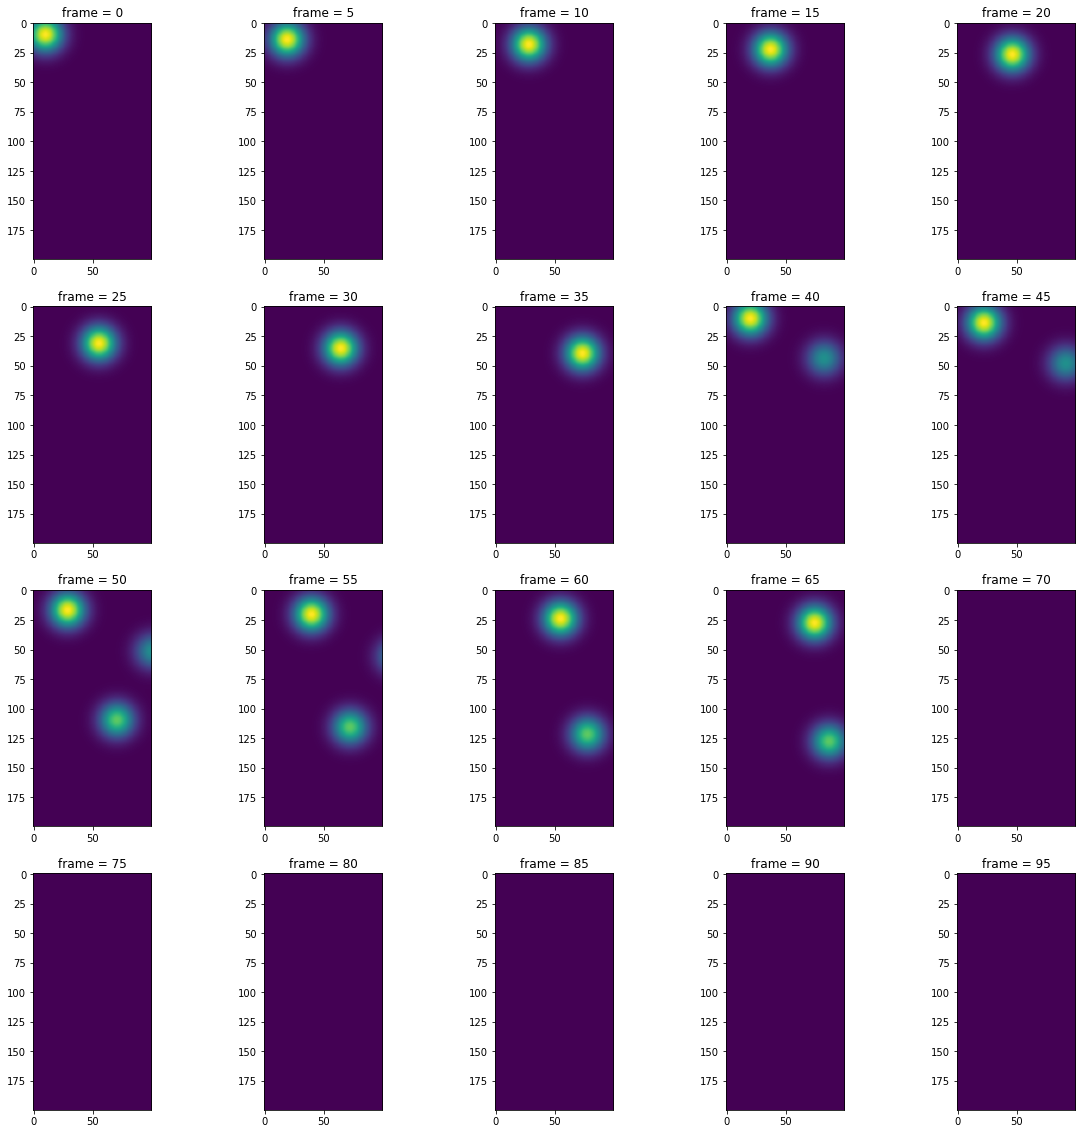

In [28]:
fig, ax = plt.subplots(ncols = 5, nrows = 4, figsize  = (20, 20))
d = 5
for n, axis in enumerate(np.ravel(ax)):
    axis.imshow(data.data[n*d])
    axis.set_title('frame = {}'.format(n*d))

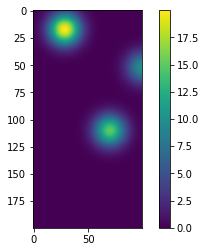

In [39]:
plt.imshow(data.data[50])
plt.colorbar()

In [47]:
dxy, dt = tobac.utils.get_spacings(data)
threshold = [i for i in range(9, 18)]
features = tobac.themes.tobac_v1.feature_detection_multithreshold(data, dxy, threshold)

     frame  idx      hdim_1     hdim_2  num  threshold_value  feature  \
0        0    1   10.000000  10.000000   69                9        1   
1        1    1   10.939394  11.848485   66                9        2   
2        2    1   11.707692  13.661538   65                9        3   
3        3    1   12.569231  15.353846   65                9        4   
4        4    1   13.200000  17.107692   65                9        5   
..     ...  ...         ...        ...  ...              ...      ...   
97      67   23   29.500000  83.000000  104               17       98   
98      68   17  131.761905  93.142857   42               14       99   
99      68   23   30.100000  87.790000  100               17      100   
100     69   17  132.809524  96.071429   42               14      101   
101     69   23   30.931373  92.686275  102               17      102   

                    time              timestr  projection_y_coordinate  \
0    2000-01-01 12:00:00  2000-01-01 12:00:00    

In [48]:
features

<xarray.Dataset>
Dimensions:                  (index: 102)
Coordinates:
  * index                    (index) int64 0 1 2 3 4 5 6 ... 96 97 98 99 100 101
Data variables: (12/13)
    frame                    (index) int64 0 1 2 3 4 5 6 ... 67 67 68 68 69 69
    idx                      (index) int64 1 1 1 1 1 1 1 ... 17 23 17 23 17 23
    hdim_1                   (index) float64 10.0 10.94 11.71 ... 132.8 30.93
    hdim_2                   (index) float64 10.0 11.85 13.66 ... 96.07 92.69
    num                      (index) int64 69 66 65 65 65 ... 104 42 100 42 102
    threshold_value          (index) int64 9 9 9 9 9 9 9 ... 14 17 14 17 14 17
    ...                       ...
    time                     (index) object 2000-01-01 12:00:00 ... 2000-01-0...
    timestr                  (index) object '2000-01-01 12:00:00' ... '2000-0...
    projection_y_coordinate  (index) float64 1e+04 1.094e+04 ... 3.093e+04
    projection_x_coordinate  (index) float64 1e+04 1.185e+04 ... 9.269e+04
    latitude                 (index) object 24.1 24.12 24.14 ... 24.96 24.93
    longitude                (index) object 150.1 150.1 150.1 ... 151.3 150.3

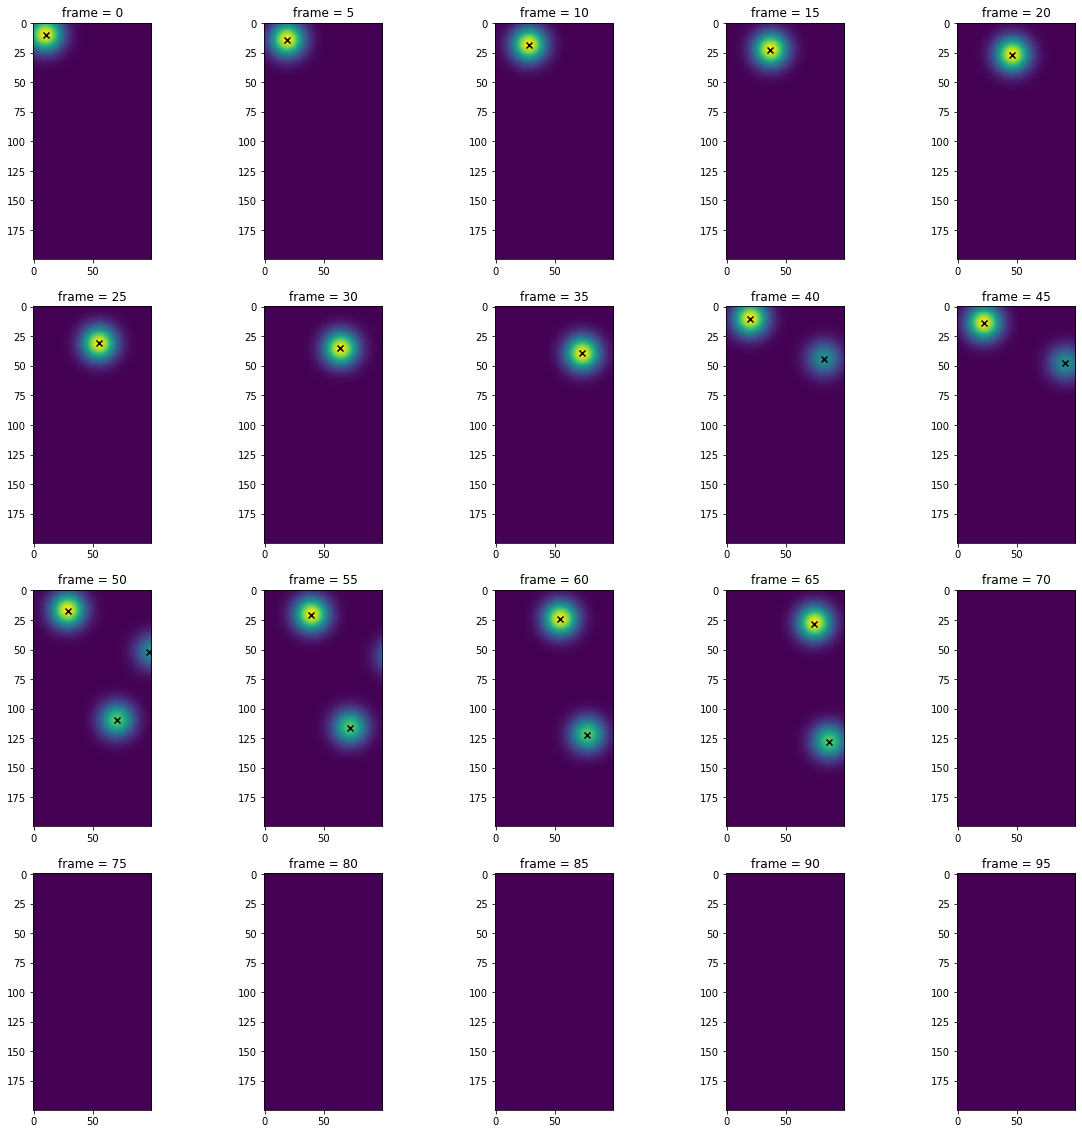

In [49]:
fig, ax = plt.subplots(ncols = 5, nrows = 4, figsize  = (20, 20))
d = 5
for n, axis in enumerate(np.ravel(ax)):
    axis.imshow(data.data[n*d])
    axis.set_title('frame = {}'.format(n*d))
    mask_1 = features['frame'] == n*d
    axis.scatter(features.where(mask_1)['hdim_2'], features.where(mask_1)['hdim_1'], color = 'black', marker = 'x')

TypeError: string indices must be integers

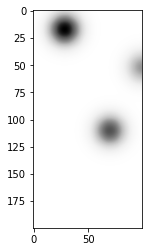

In [82]:
n = 50
mask = features['frame'] == n

plt.imshow(data.data[n], cmap = 'Greys')

frame_features = features.where(mask).dropna('index')
for i in frame_features:
    plt.plot(i['hdim_2'], i['hdim_1'])
plt.legend()
#plt.scatter(features.where(mask)['hdim_2'], features.where(mask)['hdim_1'], c = features.where(mask)['threshold_value'], marker = 'x')

In [79]:
features.where(mask).dropna('index')

<xarray.Dataset>
Dimensions:                  (index: 3)
Coordinates:
  * index                    (index) int64 60 61 62
Data variables: (12/13)
    frame                    (index) float64 50.0 50.0 50.0
    idx                      (index) float64 2.0 18.0 24.0
    hdim_1                   (index) float64 52.0 110.0 17.12
    hdim_2                   (index) float64 97.73 70.0 28.66
    num                      (index) float64 30.0 45.0 101.0
    threshold_value          (index) float64 9.0 14.0 17.0
    ...                       ...
    time                     (index) object 2000-01-01 12:50:00 ... 2000-01-0...
    timestr                  (index) object '2000-01-01 12:50:00' ... '2000-0...
    projection_y_coordinate  (index) float64 5.2e+04 1.1e+05 1.712e+04
    projection_x_coordinate  (index) float64 9.773e+04 7e+04 2.866e+04
    latitude                 (index) object 24.98 24.7 24.29
    longitude                (index) object 150.5 151.1 150.2

In [77]:
features.where(mask)

<xarray.Dataset>
Dimensions:                  (index: 102)
Coordinates:
  * index                    (index) int64 0 1 2 3 4 5 6 ... 96 97 98 99 100 101
Data variables: (12/13)
    frame                    (index) float64 nan nan nan nan ... nan nan nan nan
    idx                      (index) float64 nan nan nan nan ... nan nan nan nan
    hdim_1                   (index) float64 nan nan nan nan ... nan nan nan nan
    hdim_2                   (index) float64 nan nan nan nan ... nan nan nan nan
    num                      (index) float64 nan nan nan nan ... nan nan nan nan
    threshold_value          (index) float64 nan nan nan nan ... nan nan nan nan
    ...                       ...
    time                     (index) object nan nan nan nan ... nan nan nan nan
    timestr                  (index) object nan nan nan nan ... nan nan nan nan
    projection_y_coordinate  (index) float64 nan nan nan nan ... nan nan nan nan
    projection_x_coordinate  (index) float64 nan nan nan nan ... nan nan nan nan
    latitude                 (index) object nan nan nan nan ... nan nan nan nan
    longitude                (index) object nan nan nan nan ... nan nan nan nan

In [85]:
frame_features.

AttributeError: 'Dataset' object has no attribute 'data'